# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

## Load data

In [2]:
# Load the data files into different DataFrames
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I observe that there are no issues with the above data sample.

## Fix data

## Enrich data

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
display(users)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


I have notice that reg_date & churn_date are objects that need conversion to date_time datatypes.

### Fix Data

In [7]:
users['reg_date']=pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])

In [8]:
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enrich Data

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
display(calls)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


I have noticed that call_date are objects that need conversion to date_time datatypes. 
I have noticed that duration needs to be rounded up with ceil function.

### Fix data

In [11]:
calls['call_date']=pd.to_datetime(calls['call_date'])

### Enrich data

In [12]:
calls['duration']= calls['duration'].apply(math.ceil)

In [13]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


## Messages

In [14]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Print a sample of data for messages
display(messages)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


I have noticed that message_date column needs to be converted to date_time datatype.

### Fix data

In [16]:
messages['message_date']=pd.to_datetime(messages['message_date'])

### Enrich data

## Internet

In [17]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Print a sample of data for the internet traffic
display(internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


i noticed that the session_date column needs conversion to datetime datatype.

### Fix data

In [19]:
internet['session_date']= pd.to_datetime(internet['session_date'])

### Enrich data

## Study plan conditions

In [20]:
# Print out the plan conditions and make sure they are clear for you
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [21]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].apply(math.ceil)

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls['month']=calls['call_date'].dt.month
calls.drop(columns='call_date',inplace=True)

In [23]:
calls_agg =calls.groupby(['user_id','month'])['duration'].sum().reset_index()

In [24]:
calls_agg.columns=['user_id','month','calls_sum']

In [25]:
calls_agg

,user_id,month,calls_sum
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month']=messages['message_date'].dt.month
messages_per_month=messages.groupby(['user_id','month']).count().reset_index()
messages_per_month.drop(columns=['id'],inplace=True)
messages_per_month.columns=['user_id','month','messages_count']

In [27]:
messages_per_month

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month']=internet['session_date'].dt.month
internet['md_used'] = internet['mb_used'].apply(math.ceil)
internet_used_per_month= internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_used_per_month.columns=['user_id','month','internet_sum']
internet_used_per_month

,user_id,month,internet_sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [29]:
internet['month']=internet['session_date'].dt.month
internet_used_per_month_count= internet.groupby(['user_id','month'])['mb_used'].count().reset_index()
internet_used_per_month_count.columns=['user_id','month','internet_count']
internet_used_per_month_count

,user_id,month,internet_count
0,1000,12,5
1,1001,8,25
2,1001,9,53
3,1001,10,56
4,1001,11,51
...,...,...,...
2272,1498,12,65
2273,1499,9,45
2274,1499,10,61
2275,1499,11,49


In [30]:
unique_user_per_month = (calls_agg
.merge(messages_per_month, on=['user_id', 'month'], how='outer')
.merge(internet_used_per_month, on=['user_id', 'month'], how='outer')
.merge(internet_used_per_month_count, on=['user_id','month'], how='outer'))

In [31]:
unique_user_per_month

,user_id,month,calls_sum,messages_count,internet_sum,internet_count
0,1000,12,124.0,11.0,1901.47,5.0
1,1001,8,182.0,30.0,6919.15,25.0
2,1001,9,315.0,44.0,13314.82,53.0
3,1001,10,393.0,53.0,22330.49,56.0
4,1001,11,426.0,36.0,18504.30,51.0
...,...,...,...,...,...,...
2288,1349,12,NaN,61.0,13039.91,27.0
2289,1361,5,NaN,2.0,1519.69,9.0
2290,1482,10,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,233.17,2.0


In [32]:
# Add the plan information
user_revenue= unique_user_per_month.merge(users, on= 'user_id',how= 'left').merge(plans, left_on='plan', right_on='plan_name', how='left')

In [33]:
usage_columns = ['calls_sum', 'messages_count', 'internet_sum', 'internet_count']
user_revenue[usage_columns] = user_revenue[usage_columns].fillna(0)

In [34]:
user_revenue

,user_id,month,calls_sum,messages_count,internet_sum,internet_count,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,124.0,11.0,1901.47,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,182.0,30.0,6919.15,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,315.0,44.0,13314.82,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,393.0,53.0,22330.49,56.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,426.0,36.0,18504.30,51.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91,27.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2289,1361,5,0.0,2.0,1519.69,9.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2290,1482,10,0.0,2.0,0.00,0.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
2291,1108,12,0.0,0.0,233.17,2.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate


In [35]:
user_revenue['call_overage'] = np.maximum(0, user_revenue['calls_sum'] - user_revenue['minutes_included']) * user_revenue['usd_per_minute']

user_revenue['message_overage'] = np.maximum(0, user_revenue['messages_count'] - user_revenue['messages_included']) * user_revenue['usd_per_message']

user_revenue['internet_overage'] = np.maximum(0, (user_revenue['internet_sum'] - user_revenue['mb_per_month_included']) / 1024) * user_revenue['usd_per_gb']

user_revenue['monthly_revenue'] = user_revenue['usd_monthly_pay'] + user_revenue['call_overage'] + user_revenue['message_overage'] + user_revenue['internet_overage'
]

In [36]:
sample_data = user_revenue[['user_id', 'month', 'plan', 'calls_sum', 'messages_count', 'internet_sum', 
                           'call_overage', 'message_overage', 'internet_overage', 'monthly_revenue']].head(10)
display(sample_data)

,user_id,month,plan,calls_sum,messages_count,internet_sum,call_overage,message_overage,internet_overage,monthly_revenue
0,1000,12,ultimate,124.0,11.0,1901.47,0.00,0.00,0.000000,70.000000
1,1001,8,surf,182.0,30.0,6919.15,0.00,0.00,0.000000,20.000000
2,1001,9,surf,315.0,44.0,13314.82,0.00,0.00,0.000000,20.000000
3,1001,10,surf,393.0,53.0,22330.49,0.00,0.09,68.071191,88.161191
4,1001,11,surf,426.0,36.0,18504.30,0.00,0.00,30.706055,50.706055
5,1001,12,surf,412.0,44.0,19369.18,0.00,0.00,39.152148,59.152148
6,1002,10,surf,59.0,15.0,6552.01,0.00,0.00,0.000000,20.000000
7,1002,11,surf,386.0,32.0,19345.08,0.00,0.00,38.916797,58.916797
8,1002,12,surf,384.0,41.0,14396.24,0.00,0.00,0.000000,20.000000
9,1003,12,surf,1104.0,50.0,27044.14,18.12,0.00,114.102930,152.222930


## Study user behaviour

### Calls

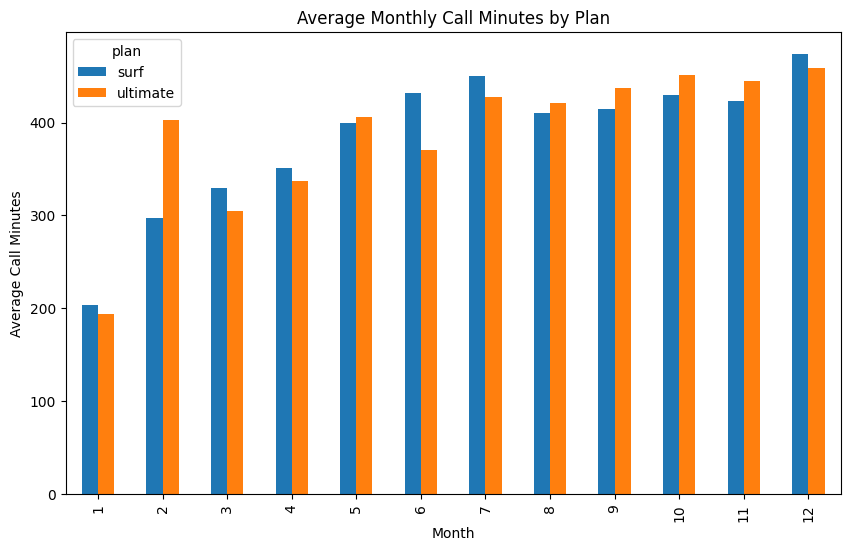

In [37]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

avg_call_minutes = user_revenue.groupby(['plan', 'month'])['calls_sum'].mean().reset_index()
avg_call_minutes_pivot = avg_call_minutes.pivot(index='month', columns='plan', values='calls_sum')
avg_call_minutes_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Call Minutes by Plan')
plt.xlabel('Month')
plt.ylabel('Average Call Minutes')
plt.show()


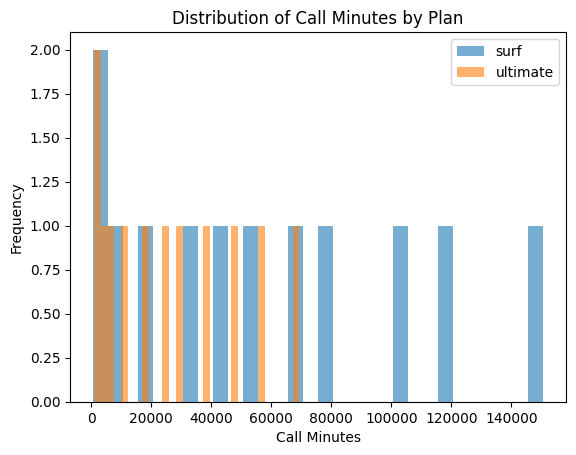

In [38]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
avg_min = user_revenue.groupby(['plan','month'])['calls_sum'].sum().reset_index()
for plan in avg_min['plan'].unique():
    plt.hist(avg_min.loc[avg_min['plan'] == plan, 'calls_sum'],
             bins=30,
             alpha=0.6,
             label=plan)
plt.xlabel('Call Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Call Minutes by Plan')
plt.legend()
plt.show()

In [39]:
# Calculate the mean and the variance of the monthly call duration
monthly_calls = user_revenue.groupby(['user_id', 'month'])['calls_sum'].sum().reset_index()
mean_duration = monthly_calls['calls_sum'].mean()
variance_duration = monthly_calls['calls_sum'].var()  

In [40]:
mean_duration

429.2834714348016

In [41]:
variance_duration

55847.17877118995

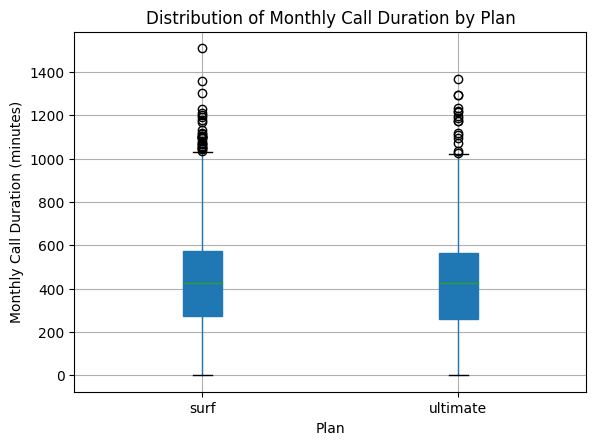

In [42]:
# Plot a boxplot to visualize the distribution of the monthly call duration
monthly_calls_with_plan = user_revenue.groupby(['user_id', 'month', 'plan'])['calls_sum'].sum().reset_index()

monthly_calls_with_plan.boxplot(column='calls_sum', by='plan', grid=True, patch_artist=True)
plt.title('Distribution of Monthly Call Duration by Plan')
plt.suptitle('') 

plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.show()


there are no major behavior differences between users in terms of calls. The only main behavior difference i notice is with in the frequency of calls. As the call minutes increase up toward 80000 the frequency in ultimate plan users stops. This tells me that ultimate users aren't pushing up against there usage limits.

### Messages

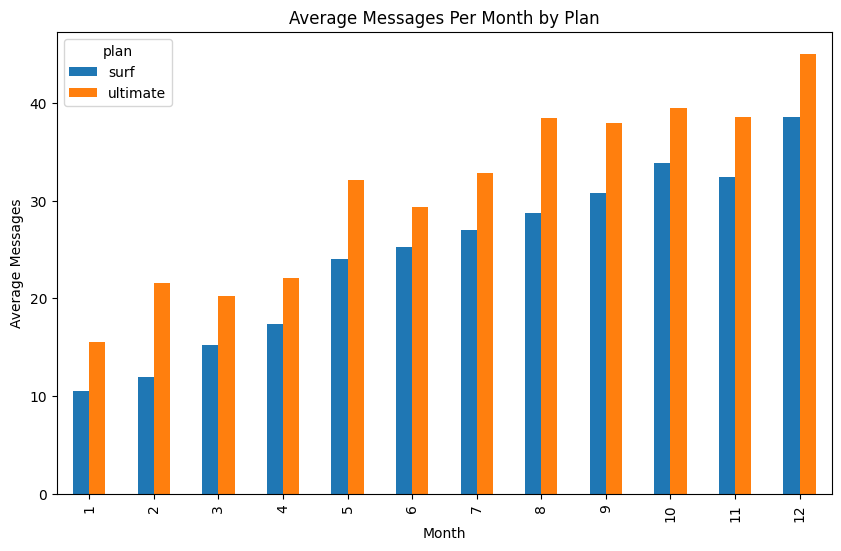

In [43]:
# Compare the number of messages users of each plan tend to send each month
avg_message_per_month = user_revenue.groupby(['plan', 'month'])['messages_count'].mean().reset_index()
avg_message_per_month_pivot = avg_message_per_month.pivot(index='month', columns='plan', values='messages_count')
avg_message_per_month_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Messages Per Month by Plan')
plt.xlabel('Month')
plt.ylabel('Average Messages')
plt.show()

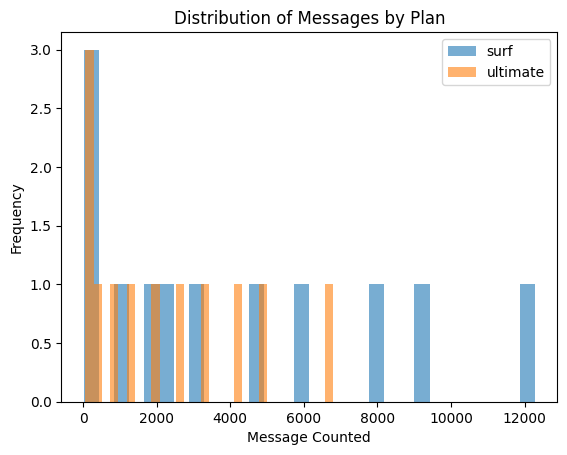

In [44]:
avg_message = user_revenue.groupby(['plan','month'])['messages_count'].sum().reset_index()

for plan in avg_message['plan'].unique():
    plt.hist( avg_message.loc[avg_message['plan'] == plan, 'messages_count'],
              bins=30,
              alpha=0.6,
              label=plan)
plt.xlabel('Message Counted')
plt.ylabel('Frequency')
plt.title('Distribution of Messages by Plan')
plt.legend()
plt.show()

In [45]:

monthly_messages = user_revenue.groupby(['user_id', 'month'])['messages_count'].sum().reset_index()
mess_mean_count = monthly_messages['messages_count'].mean()
mess_variance_count = monthly_messages['messages_count'].var() 
 

In [46]:
mess_mean_count

33.166593981683384

In [47]:
mess_variance_count

1160.770663655758

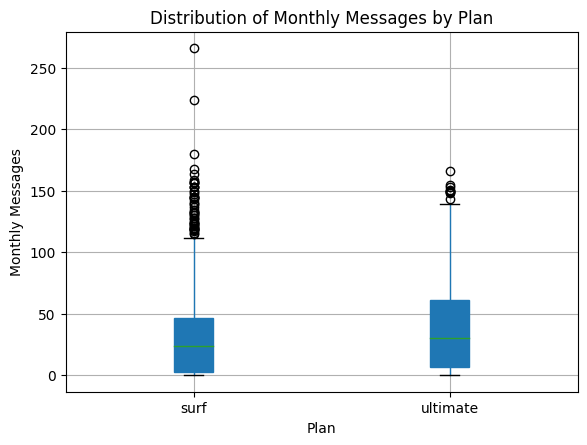

In [48]:


monthly_messages_with_plan = user_revenue.groupby(['user_id', 'month', 'plan'])['messages_count'].sum().reset_index()

monthly_messages_with_plan.boxplot(column='messages_count', by='plan', grid=True, patch_artist=True)
plt.title('Distribution of Monthly Messages by Plan')
plt.suptitle('') 
plt.xlabel('Plan')
plt.ylabel('Monthly Messages')
plt.show()



In [49]:
message_stats = user_revenue.groupby('plan')['messages_count'].agg(['mean', 'std', 'median', 'min', 'max'])
print("Message usage statistics by plan:")
print(message_stats)

Message usage statistics by plan:
               mean        std  median  min    max
plan                                              
surf      31.159568  33.566717    24.0  0.0  266.0
ultimate  37.551389  34.767179    30.0  0.0  166.0


I've noticed that users on Ultimate Plan use slightly more messages per month than users on Surf Plan.

### Internet

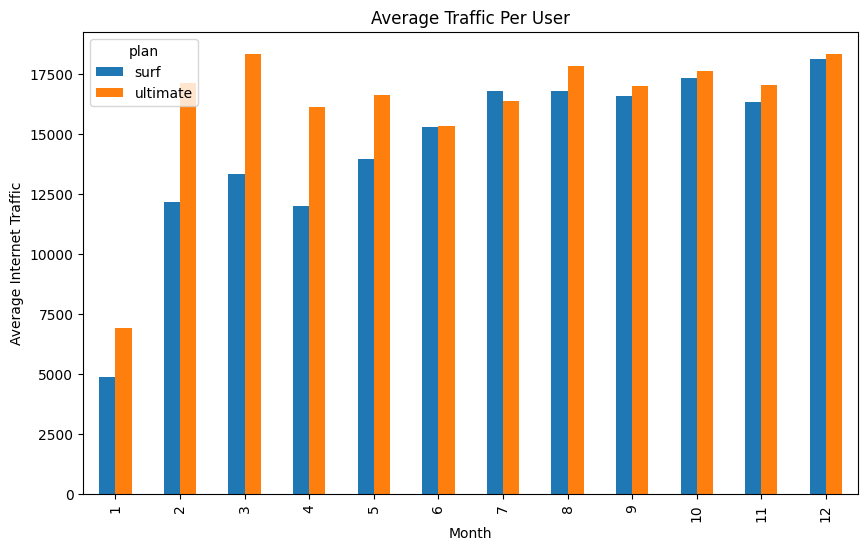

In [50]:
# Compare the amount of internet traffic consumed by users per plan
avg_int_traffic = user_revenue.groupby(['plan', 'month'])['internet_sum'].mean().reset_index()
avg_int_traffic_pivot = avg_int_traffic.pivot(index='month', columns='plan', values='internet_sum')
avg_int_traffic_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Traffic Per User')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic')
plt.show()

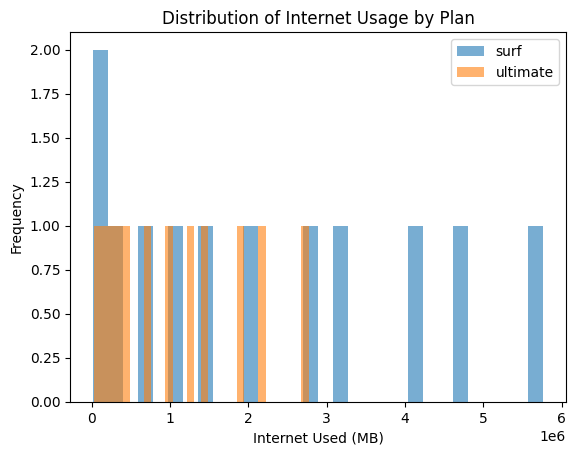

In [51]:

avg_usage = user_revenue.groupby(['plan','month'])['internet_sum'].sum().reset_index()
for plan in avg_usage['plan'].unique():
    plt.hist(avg_usage.loc[avg_usage['plan'] == plan, 'internet_sum'],
             bins=30,
             alpha=0.6,
             label=plan)
    
plt.xlabel('Internet Used (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of Internet Usage by Plan')
plt.legend()
plt.show()


In [52]:

monthly_usage = user_revenue.groupby(['user_id', 'month'])['internet_sum'].sum().reset_index()
usage_mean= monthly_usage['internet_sum'].mean()
usage_variance= monthly_usage['internet_sum'].var() 


In [53]:
usage_mean

16764.39760575665

In [54]:
usage_variance

63476873.81347372

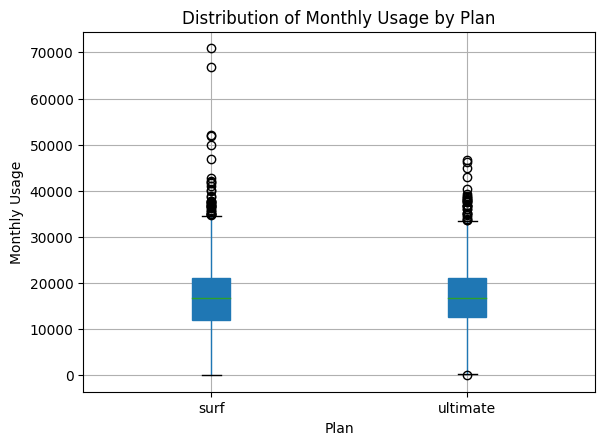

In [55]:

monthly_usage_with_plan = user_revenue.groupby(['user_id', 'month', 'plan'])['internet_sum'].sum().reset_index()

monthly_usage_with_plan.boxplot(column='internet_sum', by='plan', grid=True, patch_artist=True)
plt.title('Distribution of Monthly Usage by Plan')
plt.suptitle('') 
plt.xlabel('Plan')
plt.ylabel('Monthly Usage')
plt.show()


I've noticed that ultimate plan users have more internet traffic than surf plan users.

## Revenue

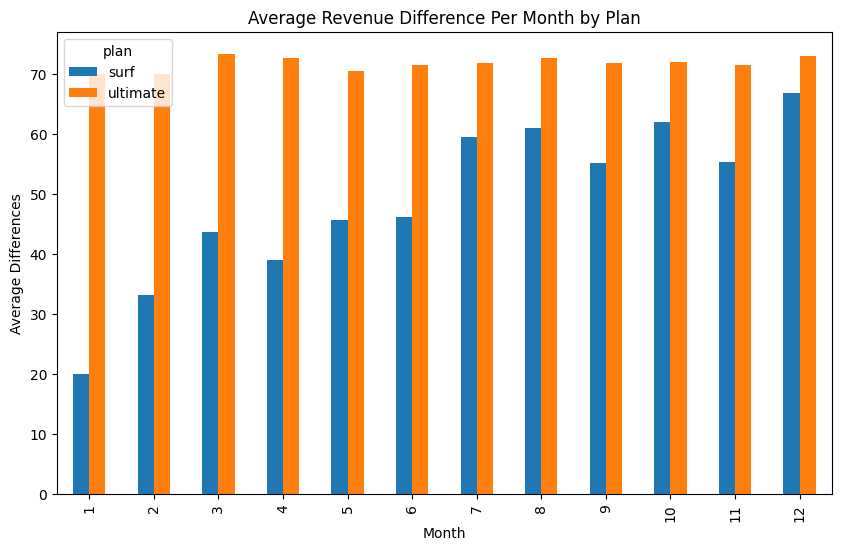

In [56]:
revenue_differences = user_revenue.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()
rev_dif_pivot = revenue_differences.pivot(index='month', columns='plan', values='monthly_revenue')
rev_dif_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Revenue Difference Per Month by Plan')
plt.xlabel('Month')
plt.ylabel('Average Differences')
plt.show()


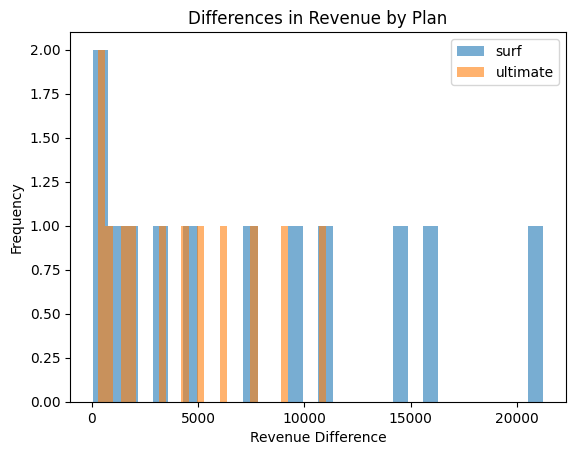

In [57]:
rev_diff = user_revenue.groupby(['plan','month'])['monthly_revenue'].sum().reset_index()
for plan in rev_diff['plan'].unique():
    plt.hist(rev_diff.loc[rev_diff['plan'] == plan, 'monthly_revenue'],
             bins=30,
             alpha=0.6,
             label=plan)

plt.xlabel('Revenue Difference')
plt.ylabel('Frequency')
plt.title('Differences in Revenue by Plan')
plt.legend()
plt.show()


In [58]:
rev_diff = user_revenue.groupby(['user_id', 'month'])['monthly_revenue'].sum().reset_index()
rev_mean= rev_diff['monthly_revenue'].mean()
rev_variance= rev_diff['monthly_revenue'].var() 

In [59]:
rev_mean

62.208008757972635

In [60]:
rev_variance

2070.984354577875

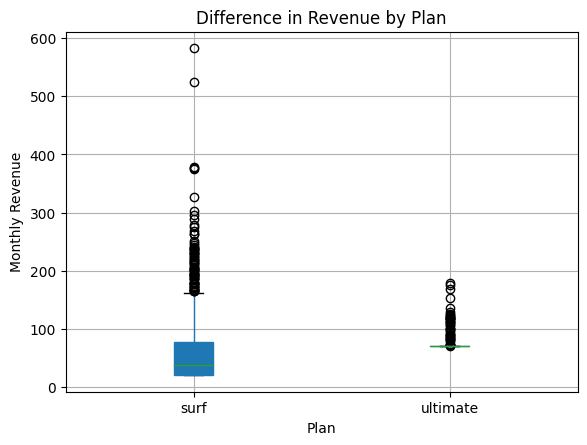

In [61]:
rev_diff = user_revenue.groupby(['user_id', 'month', 'plan'])['monthly_revenue'].sum().reset_index()

rev_diff.boxplot(column='monthly_revenue', by='plan', grid=True, patch_artist=True)
plt.title('Difference in Revenue by Plan')
plt.suptitle('') 
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()


Statistically, I've noticed the Ultimate Plan produces significantly more revenue per user then the Surf Plan each month.

## Test statistical hypotheses

In [62]:
ultimate = user_revenue[user_revenue['plan'] == 'ultimate']['monthly_revenue']
surf = user_revenue[user_revenue['plan'] == 'surf']['monthly_revenue']

Null Hypotheses
There is no difference in the average monthly revenue between Ultimate and Surf plan users.

Alternative Hypotheses
There is a difference in the average monthly revenue between Ultimate and Surf plan users.

In [63]:
# Test the hypotheses

alpha=0.05
p_val = stats.ttest_ind(ultimate, surf, equal_var=False)
print('p-value:',p_val.pvalue)

if p_val.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 8.530525302626667e-24
We reject the null hypothesis


There is a statistically significant difference in average monthly revenue between Ultimate and Surf plan users.

In [64]:
nynj_region= user_revenue[user_revenue['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]

In [65]:
other_regions= user_revenue[~user_revenue['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]

Null Hypotheses
There is no difference in the average monthly revenue between users in the NY–NJ region and users in other regions.

Alternative Hypotheses
The average monthly revenue of users in the NY–NJ region differs from that of users in other regions.

In [66]:
# Test the hypotheses

alpha = 0.05
nynj_revenue = nynj_region['monthly_revenue']
other_revenue = other_regions['monthly_revenue']

p_regions = stats.ttest_ind(nynj_revenue, other_revenue, equal_var=False)
print('p-value:', p_regions.pvalue)
if p_regions.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.020128295172528086
We reject the null hypothesis


The average monthly revenue of users in the NY–NJ region differs from that of users in other regions.

Data Preparation

Several columns were initially stored as object datatypes, so I converted them into appropriate datetime formats to ensure accurate time-based analysis.

I applied the ceil() function to round up call durations to the nearest minute, ensuring consistent and realistic billing and usage calculations.

Behavioral Insights

There were no major behavioral differences between users of the two calling plans in terms of average call durations.

The main behavioral difference appeared in call frequency: as total call minutes increased (approaching ~80,000), the frequency of calls among Ultimate plan users plateaued — suggesting that they are not constrained by usage limits, unlike Surf plan users.

Ultimate plan users sent slightly more messages per month compared to Surf plan users.

Ultimate plan users also demonstrated higher internet traffic, indicating heavier data consumption.

Revenue Insights

Statistical testing showed that the Ultimate Plan produces significantly more revenue per user than the Surf Plan each month.

When testing the hypothesis that average revenue differs between users in the NY–NJ area and other regions, the p-value = 0.0201, which is less than α = 0.05 → Reject the null hypothesis.

Conclusion: There is a statistically significant difference in average revenue between NY–NJ users and users in other regions.

When testing the hypothesis that average revenue differs between Ultimate and Surf plan users, the p-value = 8.53×10⁻²⁴, also less than α = 0.05 → Reject the null hypothesis.

Overall Summary

After cleaning, transforming, and analyzing the dataset:

Data quality and type conversions were crucial for accurate analysis.

Behaviorally, Ultimate users tend to use more data and messages but have similar calling patterns.

Statistically, both regional location (NY–NJ vs. others) and plan type (Ultimate vs. Surf) have significant effects on average revenue.